#Estadística descriptiva.

In [ ]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("Datos_resultantes0.8.csv")
print(data)

       ErrTime   RMS    Az  Depth  ErrDepth  Ndef    Gap  mdist  Mdist_  \
0         2.18  0.19  81.0   21.6      12.7   9.0  189.0   0.02    0.20   
1         2.19  0.20  67.0   28.2      13.0   8.0  149.0   0.03    0.13   
2         2.33  0.16  87.0   24.2      14.0   8.0  181.0   0.01    0.19   
3         2.44  0.11  87.0   24.4      13.7   8.0  189.0   0.02    0.20   
4         1.93  0.17  90.0   26.3      11.5  10.0  168.0   0.03    0.20   
...        ...   ...   ...    ...       ...   ...    ...    ...     ...   
15557     0.68  0.43  84.0    2.5       3.6  15.0  137.0   0.02    0.08   
15558     1.29  0.22  80.0   13.6       7.4  20.0  113.0   0.02    0.15   
15559     0.80  0.37  75.0    3.1       3.6  16.0  193.0   0.04    0.10   
15560     0.87  0.45  70.0    1.1       7.0  13.0  149.0   0.01    0.07   
15561     2.02  0.21  75.0   16.5      10.2  13.0  146.0   0.01    0.13   

       Magnitud  
0           1.6  
1           2.7  
2           1.7  
3           1.7  
4        

In [ ]:
#Mostramos las primeras cinco filas
print(data.head())

   ErrTime   RMS    Az  Depth  ErrDepth  Ndef    Gap  mdist  Mdist_  Magnitud
0     2.18  0.19  81.0   21.6      12.7   9.0  189.0   0.02    0.20       1.6
1     2.19  0.20  67.0   28.2      13.0   8.0  149.0   0.03    0.13       2.7
2     2.33  0.16  87.0   24.2      14.0   8.0  181.0   0.01    0.19       1.7
3     2.44  0.11  87.0   24.4      13.7   8.0  189.0   0.02    0.20       1.7
4     1.93  0.17  90.0   26.3      11.5  10.0  168.0   0.03    0.20       2.6


In [ ]:
#Información general
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15562 entries, 0 to 15561
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ErrTime   15562 non-null  float64
 1   RMS       15562 non-null  float64
 2   Az        15562 non-null  float64
 3   Depth     15562 non-null  float64
 4   ErrDepth  15562 non-null  float64
 5   Ndef      15562 non-null  float64
 6   Gap       15562 non-null  float64
 7   mdist     15562 non-null  float64
 8   Mdist_    15562 non-null  float64
 9   Magnitud  15562 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB
None


In [ ]:
#Estadísticas descriptivas generales
print(data.describe())

            ErrTime           RMS            Az         Depth      ErrDepth  \
count  15562.000000  15562.000000  15562.000000  15562.000000  15562.000000   
mean       1.235685      0.278312     92.517993     13.911579      7.978332   
std        0.647005      0.146610     33.767785      9.682166      4.453136   
min        0.220000      0.000000      0.000000      0.000000      1.600000   
25%        0.610000      0.210000     74.000000      7.800000      5.100000   
50%        1.010000      0.260000     82.000000     11.500000      6.400000   
75%        1.800000      0.300000     95.000000     21.500000     10.800000   
max        6.310000      2.000000    178.000000     91.500000     90.800000   

               Ndef           Gap         mdist        Mdist_      Magnitud  
count  15562.000000  15562.000000  15562.000000  15562.000000  15562.000000  
mean      17.485477    149.319046      0.032232      0.376261      2.043471  
std        8.853364     60.268006      0.034010      0

In [ ]:
#Valores nulos por variable
print(data.isnull().sum())

ErrTime     0
RMS         0
Az          0
Depth       0
ErrDepth    0
Ndef        0
Gap         0
mdist       0
Mdist_      0
Magnitud    0
dtype: int64


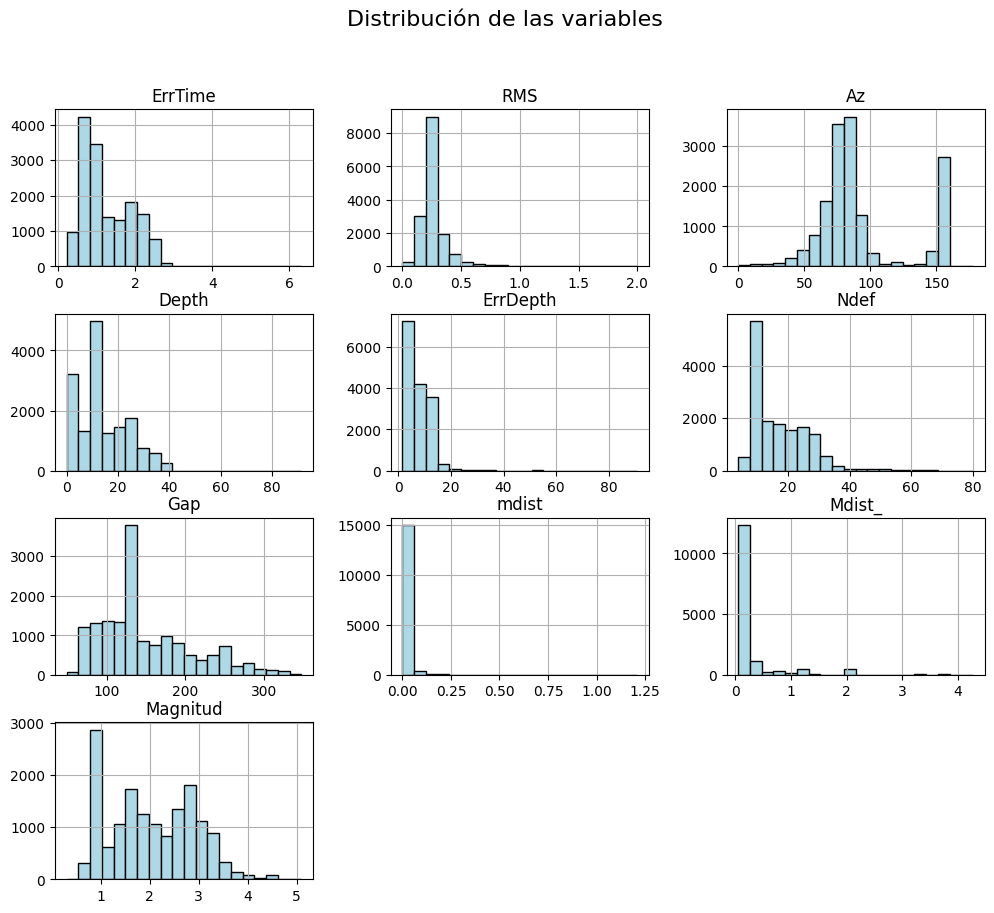

In [ ]:
# Análisis de la distribución de cada variable (histogramas)
data.hist(bins=20, figsize=(12, 10), color='lightblue', edgecolor='black')
plt.suptitle("Distribución de las variables", fontsize=16)
plt.show()

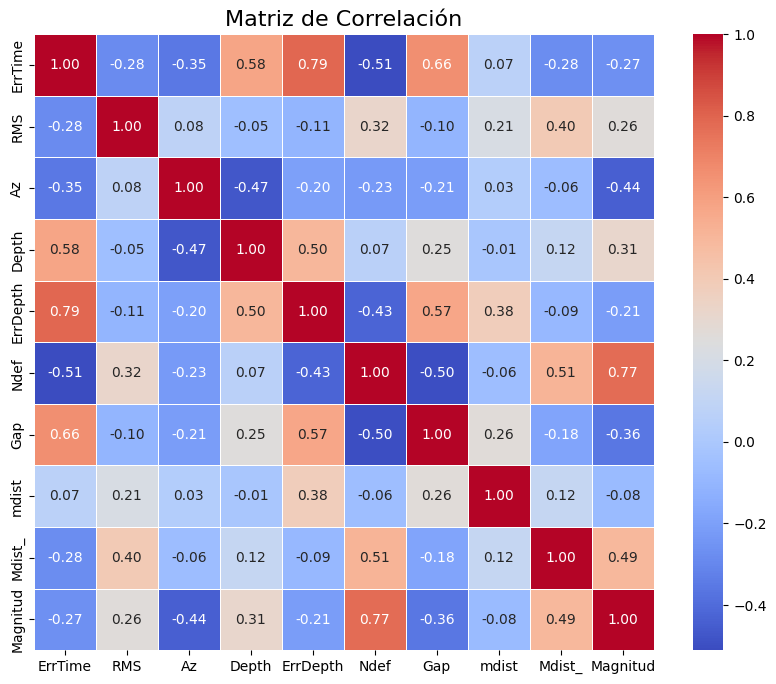

In [ ]:
# Visualización de la matriz de correlación
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

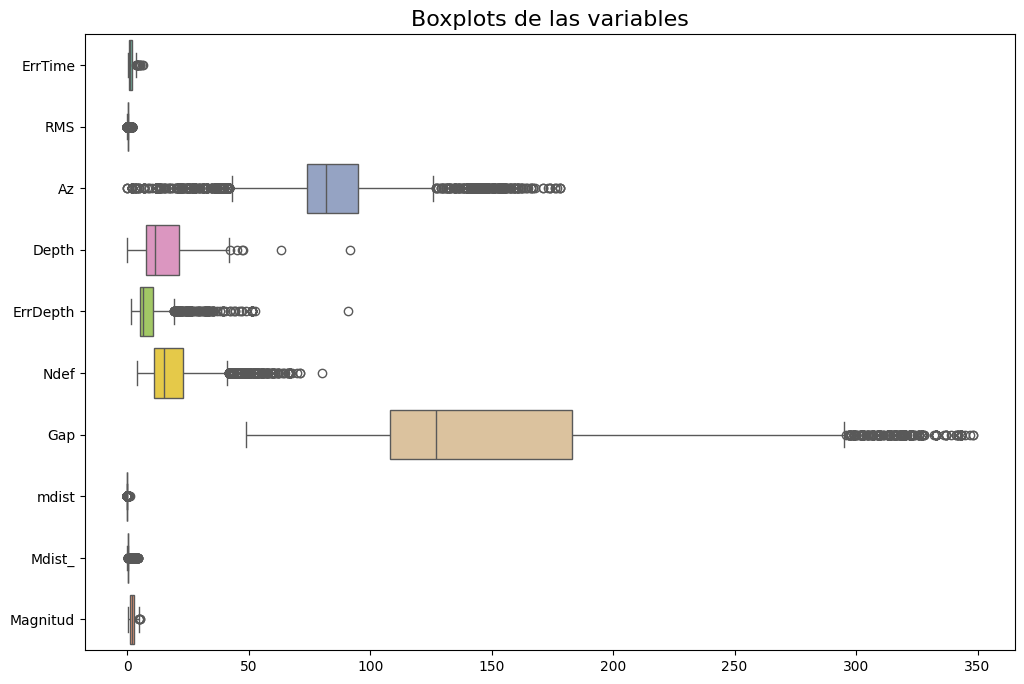

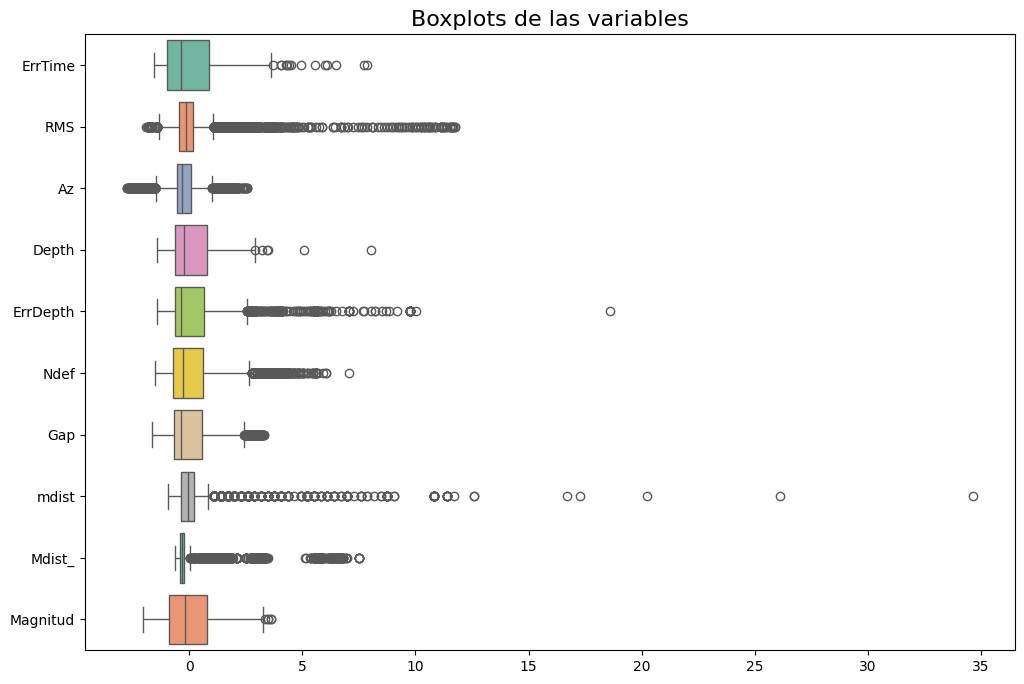

In [ ]:
# Boxplots para detectar valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h', palette='Set2')
plt.title("Boxplots de las variables", fontsize=16)
plt.show()
# Normalización para box plots
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# Boxplots para detectar valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalized, orient='h', palette='Set2')
plt.title("Boxplots de las variables", fontsize=16)
plt.show()

In [ ]:
# Análisis de valores atípicos y dispersión
print("\nAnálisis de valores atípicos y dispersión:")
for column in data.select_dtypes(include=[np.number]).columns:
    print(f"\nAnálisis de la columna '{column}':")
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    print(f"Valores atípicos detectados: {outliers.shape[0]} filas")
    print(f"Rango intercuartil (IQR) para {column}: {IQR}")


Análisis de valores atípicos y dispersión:

Análisis de la columna 'ErrTime':
Valores atípicos detectados: 14 filas
Rango intercuartil (IQR) para ErrTime: 1.19

Análisis de la columna 'RMS':
Valores atípicos detectados: 1067 filas
Rango intercuartil (IQR) para RMS: 0.09

Análisis de la columna 'Az':
Valores atípicos detectados: 3624 filas
Rango intercuartil (IQR) para Az: 21.0

Análisis de la columna 'Depth':
Valores atípicos detectados: 6 filas
Rango intercuartil (IQR) para Depth: 13.7

Análisis de la columna 'ErrDepth':
Valores atípicos detectados: 228 filas
Rango intercuartil (IQR) para ErrDepth: 5.700000000000001

Análisis de la columna 'Ndef':
Valores atípicos detectados: 283 filas
Rango intercuartil (IQR) para Ndef: 12.0

Análisis de la columna 'Gap':
Valores atípicos detectados: 347 filas
Rango intercuartil (IQR) para Gap: 75.0

Análisis de la columna 'mdist':
Valores atípicos detectados: 558 filas
Rango intercuartil (IQR) para mdist: 0.02

Análisis de la columna 'Mdist_':
Valo

In [ ]:
# Análisis de distribuciones de variables categóricas (si existen)
categorical_columns = data.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print("\nDistribución de las variables categóricas:")
    for column in categorical_columns:
        print(f"\nDistribución de {column}:")
        print(data[column].value_counts())
        sns.countplot(x=column, data=data, palette='Set1')
        plt.title(f"Distribución de la variable {column}", fontsize=16)
        plt.xticks(rotation=45)
        plt.show()
else:
    print("\nNo se encontraron variables categóricas.")


No se encontraron variables categóricas.
